In [14]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import h5py as h5

import os
import torch

## Load Data

In [10]:
data_images = np.load('brain_tumor_dataset/images.npy', allow_pickle=True)

In [51]:
data_labels = np.load('brain_tumor_dataset/labels.npy', allow_pickle=True)

In [57]:
data_masks = np.load('brain_tumor_dataset/masks.npy', allow_pickle=True)

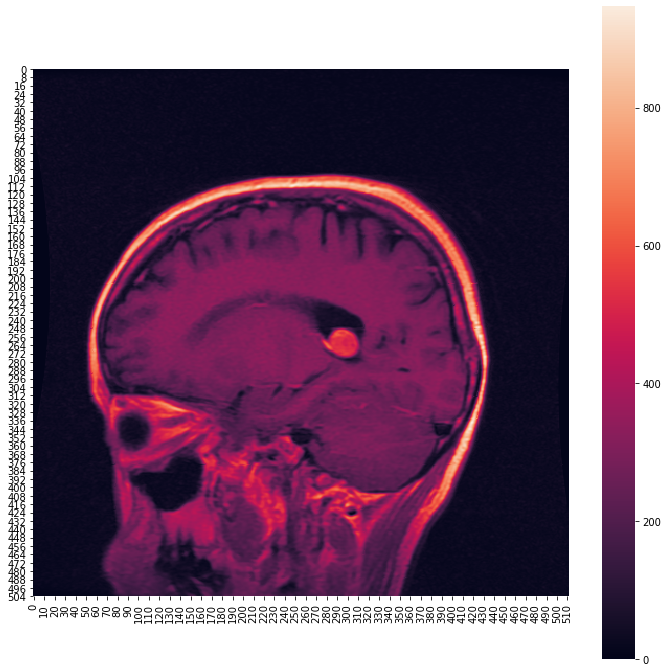

In [21]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(data_images[0], square=True)

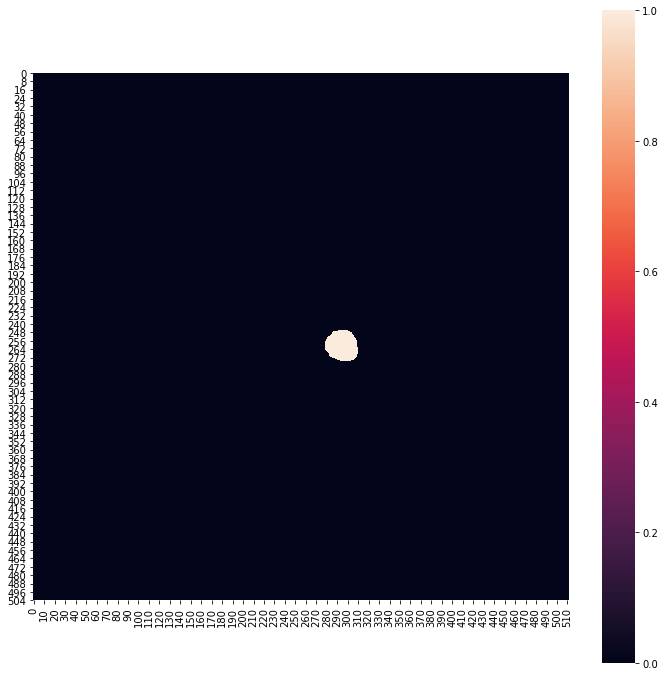

In [20]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(data_masks[0], square=True)

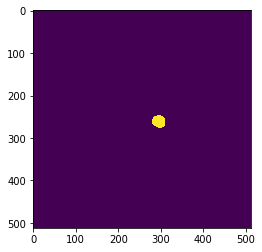

In [18]:
plt.imshow(data_masks[0] )

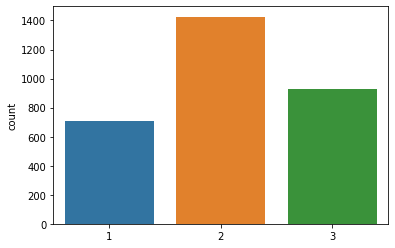

In [34]:
sns.countplot(data_labels);


Number of Meningioma tumors: 708 
Number of Glioma tumors: 1426 
Number of Pituitary tumor tumors: 930 


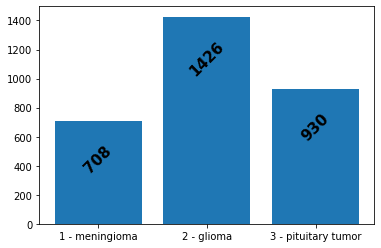

In [90]:
class_labels = {'1': 'Meningioma', '2': 'Glioma', '3': 'Pituitary tumor'}
classes, counts = np.unique(data_labels, return_counts=True)
plt.bar(classes, counts,
        tick_label=['1 - meningioma', '2 - glioma', '3 - pituitary tumor'])

for i, idx in enumerate(classes):
    print('Number of {} tumors: {} '.format(class_labels[str(idx)], counts[i]))

    labels=[1,2,3]   
for row, value in zip(labels,counts):

    plt.annotate(int(value), xy=(row, value-150), 
                rotation=45, color="black", 
                ha="center", verticalalignment='top', 
                fontsize=15, fontweight="bold")

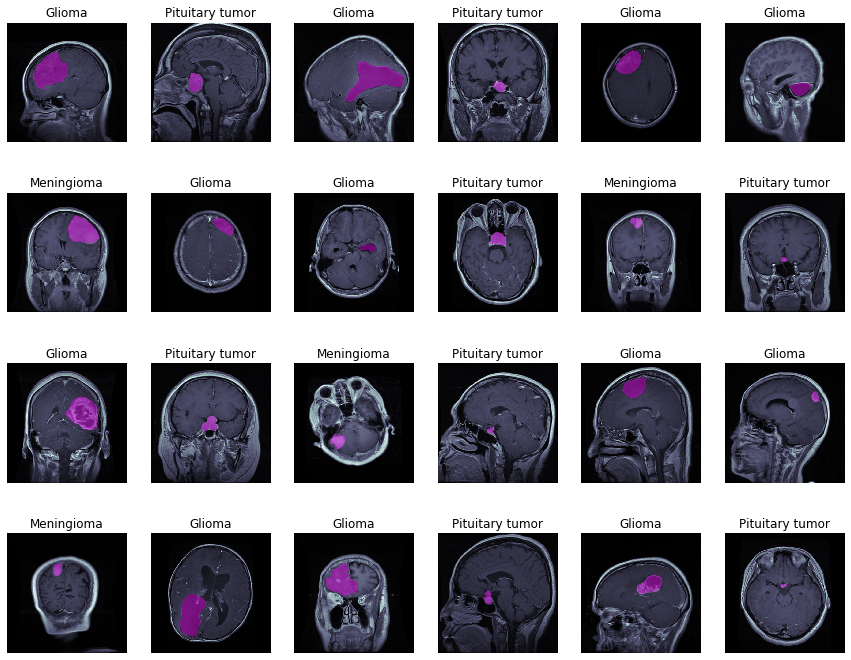

In [71]:
plt.figure(figsize=(15, 12))
for i, idx in enumerate(np.random.randint(data_images.shape[0], size=24), start=1):
    plt.subplot(4, 6, i)
    plt.imshow(data_images[idx], cmap='bone')
    
    # set black pixel as transparent for the mask
    mask = np.ma.masked_where(data_masks[idx] == False, data_masks[idx])
    plt.imshow(mask, alpha=0.4, cmap='spring')
    
    plt.title(class_labels[str(data_labels[idx])])
    plt.axis('off')
